
Water. An essential ingredient for life. Without it, the human body would last roughly 3 days before perishing out of dehydration. With that being said, many bodies of water are not safe for consumption, or not potable. This can be due to the chemical compostion, the cleanliness, and the over all appeal of such water.
In this data science project, we have take the task of being scientist to help find and build a machine learning model that will allow us to take a sample water sample from any water source, and make an accurate prediciton that the water can be classified as potable(1) or not potable(0).
The dataset was sourced from Kaggle: https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability

In [1]:
#loading in dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('/content/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [2]:
df.shape

(3276, 10)

In [3]:
df.describe()
#here something we took note of is that the median and the mean are very close to each other
#here we also notice that solids sticks out becuase of its range: ~61000 to ~320

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [4]:
df.columns


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [5]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

# outliers

In [6]:
df.skew() #.75 and over needs to be addressed/ treated

ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
Potability         0.450784
dtype: float64

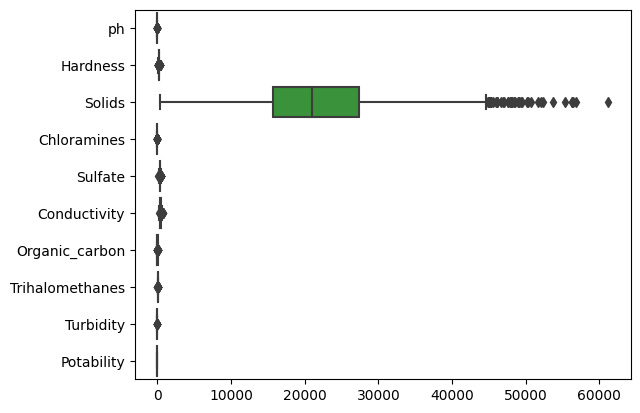

In [7]:
sns.boxplot(data = df, orient="h"); #Before Robust Scaler

In [8]:
scaler = RobustScaler()
robusted_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

<Axes: >

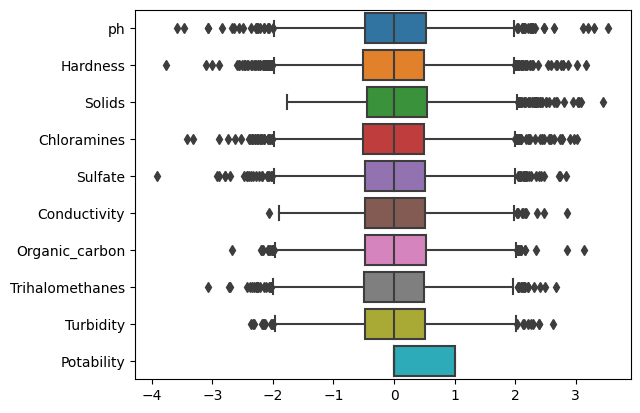

In [9]:
sns.boxplot(data=robusted_df, orient="h")

In [10]:
min_threshold = -2
max_threshold = 2
clamped_data = np.clip(robusted_df, min_threshold, max_threshold)

#reference: 'Fundamentals of Marchine learning for Predictive Analytics 2015', chapter 3- handling outliers

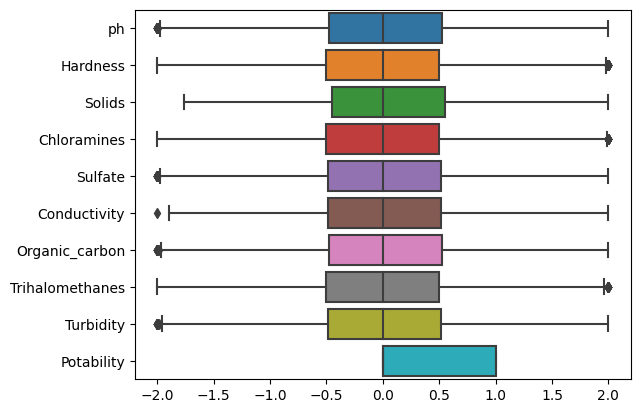

In [11]:
sns.boxplot(data = clamped_data, orient="h");

# Missing Values

In [12]:
clamped_data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [13]:
imputer = KNNImputer(n_neighbors=3)
imputed_df = pd.DataFrame(imputer.fit_transform(clamped_data), columns=clamped_data.columns)

In [14]:
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(imputed_df), columns=imputed_df.columns)
scaled_df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [15]:
scaled_df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.412252,0.549745,0.465881,0.521373,0.669581,0.806794,0.286360,0.736921,0.266197,0.0
1,0.078375,0.075904,0.416694,0.437728,0.665986,0.868351,0.553523,0.380270,0.628612,0.0
2,0.634889,0.671213,0.445813,0.769889,0.433378,0.492937,0.647506,0.497646,0.288071,0.0
3,0.662523,0.609286,0.493809,0.616862,0.613934,0.373730,0.734769,0.892212,0.658810,0.0
4,0.760983,0.400381,0.401876,0.426577,0.390251,0.449434,0.351951,0.097257,0.528297,0.0


# Imbalanced Data Manipulation

In [16]:
scaled_df.Potability.value_counts()

0.0    1998
1.0    1278
Name: Potability, dtype: int64

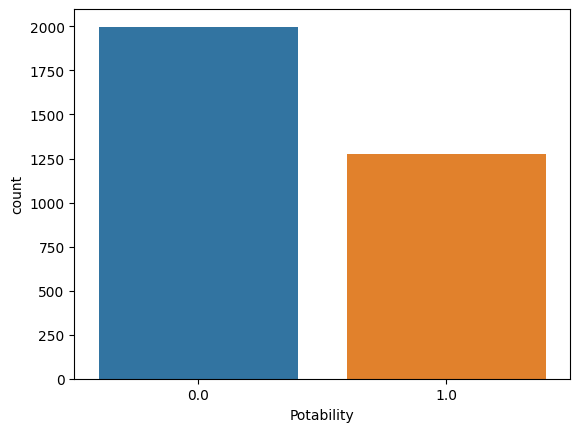

In [17]:
sns.countplot(scaled_df, x=scaled_df.Potability);

In [18]:
X = scaled_df.drop('Potability', axis=1)
y = scaled_df['Potability']

In [19]:
#HERE WE TRY OVERFITTING MINORITY CLASS
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


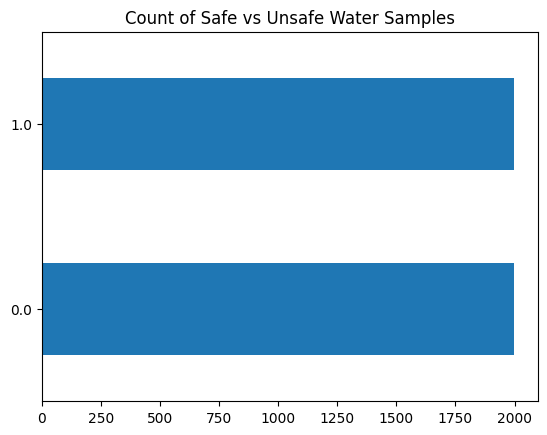

In [21]:
(pd.Series(y_resampled).value_counts(sort=False).plot.barh().set_title('Count of Safe vs Unsafe Water Samples'))
plt.show()

# Building Model 1: Logistic Regression

**Logistic Model without Halving Random Search**


In [22]:
# Logistic Regression
Log_Mod = LogisticRegression()
Log_Mod.fit(X_train, y_train)
y_predLR = Log_Mod.predict(X_test)
print("Accuracy on training set: {:.3f}".format(Log_Mod.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(Log_Mod.score(X_test, y_test)))
print("Logistic Regression:")
print(classification_report(y_predLR, y_test))
#potable = 1, and not safe = 0

Accuracy on training set: 0.528
Accuracy on test set: 0.515
Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.56      0.51      0.53       438
         1.0       0.47      0.52      0.49       362

    accuracy                           0.52       800
   macro avg       0.52      0.52      0.51       800
weighted avg       0.52      0.52      0.52       800



**Logistic Model <u>With</u> Halving Random Search**


In [23]:
# Logistic Regression with Hyperparameter Tuning
param_gridLR = [{'penalty':['elasticnet','l1','l2'],
              'C':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}]
LRHR = HalvingRandomSearchCV(LogisticRegression(), param_gridLR, cv = 6)
LRHR.fit(X_train, y_train)
LRHR.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 21 is smaller than n_iter=133. Running 21 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
84 fits failed out of a total of 126.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic

{'penalty': 'l2', 'C': 0.0001}

In [24]:
LRHR.best_params_

{'penalty': 'l2', 'C': 0.0001}

In [25]:
# Logistic Regression Results
updateLog_Mod = LogisticRegression(penalty= 'l2', C= 100.0)
updateLog_Mod.fit(X_train, y_train)
y_predLR_tuned = updateLog_Mod.predict(X_test)
print(classification_report(y_predLR_tuned, y_test))
print("Logistic Regression (Tuned):")
print("Accuracy on training set: {:.3f}".format(updateLog_Mod.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(updateLog_Mod.score(X_test, y_test)))

              precision    recall  f1-score   support

         0.0       0.56      0.51      0.53       438
         1.0       0.47      0.52      0.49       362

    accuracy                           0.52       800
   macro avg       0.52      0.52      0.51       800
weighted avg       0.52      0.52      0.52       800

Logistic Regression (Tuned):
Accuracy on training set: 0.528
Accuracy on test set: 0.515


## Logistic Regression using Polynomial Features

In [26]:
#increasing the power the 2nd degree
lr = LogisticRegression()
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test=poly.transform(X_test)
lr.fit(X_poly_train,y_train)
y_pred_poly = lr.predict(X_poly_test)
print("Logistic Regression using polynomial features:")
print(classification_report(y_pred_poly, y_test))
print("Accuracy on training set: {:.3f}".format(lr.score(X_poly_train, y_train)))
print("Accuracy on test set: {:.3f}".format(lr.score(X_poly_test, y_test)))

Logistic Regression using polynomial features:
              precision    recall  f1-score   support

         0.0       0.72      0.63      0.67       452
         1.0       0.59      0.68      0.63       348

    accuracy                           0.65       800
   macro avg       0.65      0.66      0.65       800
weighted avg       0.66      0.65      0.65       800

Accuracy on training set: 0.665
Accuracy on test set: 0.652


# Building Model 2: MLP

**MLP without Param_gridMLP**

In [27]:
MLP = MLPClassifier()
MLP.fit(X_train, y_train)
y_predMLP = MLP.predict(X_test)
print("\nMulti-layer Perceptron:")
print(classification_report(y_predMLP, y_test))
print("Accuracy on training set: {:.3f}".format(MLP.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(MLP.score(X_test, y_test)))


Multi-layer Perceptron:
              precision    recall  f1-score   support

         0.0       0.64      0.67      0.65       373
         1.0       0.70      0.67      0.68       427

    accuracy                           0.67       800
   macro avg       0.67      0.67      0.67       800
weighted avg       0.67      0.67      0.67       800

Accuracy on training set: 0.698
Accuracy on test set: 0.669


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
param_gridMLP = {
    'solver': ['lbfgs', 'adam', 'sgd'],
    'activation':['identity', 'logistic', 'tanh', 'relu'],
    'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1],
    'hidden_layer_sizes': [6, 8, 10, 12, 14, 16, 18, 20]};

In [29]:
HRMLP = HalvingRandomSearchCV(MLP, param_gridMLP, cv=5, scoring='accuracy')
HRMLP.fit(X_train, y_train)
HRMLP.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

{'solver': 'lbfgs',
 'hidden_layer_sizes': 16,
 'alpha': 0.0001,
 'activation': 'logistic'}

In [30]:
updated_MLP = MLPClassifier(solver = 'lbfgs', hidden_layer_sizes= 18, alpha = 0.01, activation = 'tanh')
updated_MLP.fit(X_train, y_train)
y_predUMLP = updated_MLP.predict(X_test)
accuracy_MLP = accuracy_score(y_test, y_predUMLP)

print(classification_report(y_predUMLP, y_test))
print("Accuracy on training set: {:.3f}".format(updated_MLP.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(updated_MLP.score(X_test, y_test)))

              precision    recall  f1-score   support

         0.0       0.71      0.65      0.68       429
         1.0       0.63      0.69      0.66       371

    accuracy                           0.67       800
   macro avg       0.67      0.67      0.67       800
weighted avg       0.67      0.67      0.67       800

Accuracy on training set: 0.695
Accuracy on test set: 0.671


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# Model 3: Random Forest/ XGBOOST

**Random Forest**

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("\nRandom Forest:")
print(classification_report(y_pred_rf, y_test))
print("Accuracy on training set: {:.3f}".format(rf_model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf_model.score(X_test, y_test)))


Random Forest:
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81       402
         1.0       0.80      0.82      0.81       398

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800

Accuracy on training set: 1.000
Accuracy on test set: 0.807


In [32]:
RFparameters = {"max_depth":[3, 5, 7, 9], "criterion":["gini","entropy"],
              "ccp_alpha" : [0.01, 0.05, 0.08, 0.1, 0.2],
             "min_samples_split": [10, 20, 30],
             "n_estimators": [100, 200, 300, 400, 500]}


In [33]:
Hgrid_searchRF = HalvingRandomSearchCV(RandomForestClassifier(), RFparameters)
Hgrid_searchRF.fit(X_train, y_train)
print(Hgrid_searchRF.best_estimator_)

RandomForestClassifier(ccp_alpha=0.01, max_depth=9, min_samples_split=30,
                       n_estimators=500)


In [34]:
updated_RF = RandomForestClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=7,
                       min_samples_split=20, n_estimators=500)

updated_RF.fit(X_train, y_train)
y_predURF = updated_RF.predict(X_test)
print(classification_report(y_predURF, y_test))
print("Accuracy on training set: {:.3f}".format(updated_RF.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(updated_RF.score(X_test, y_test)))

              precision    recall  f1-score   support

         0.0       0.75      0.57      0.65       519
         1.0       0.45      0.65      0.53       281

    accuracy                           0.60       800
   macro avg       0.60      0.61      0.59       800
weighted avg       0.65      0.60      0.61       800

Accuracy on training set: 0.644
Accuracy on test set: 0.599


In [35]:
updated_RF = RandomForestClassifier(ccp_alpha=0.001, max_depth=30, min_samples_split=30, n_estimators=600, max_leaf_nodes = 8, min_samples_leaf = 3,
                                    criterion = 'gini')

updated_RF.fit(X_train, y_train)
y_predURF = updated_RF.predict(X_test)
print(classification_report(y_predURF, y_test))
print("Accuracy on training set: {:.3f}".format(updated_RF.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(updated_RF.score(X_test, y_test)))

              precision    recall  f1-score   support

         0.0       0.72      0.61      0.66       467
         1.0       0.55      0.67      0.60       333

    accuracy                           0.63       800
   macro avg       0.64      0.64      0.63       800
weighted avg       0.65      0.63      0.64       800

Accuracy on training set: 0.676
Accuracy on test set: 0.634


**XGBOOST**

In [36]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train,y_train)
y_predXGB = xgbc.predict(X_test)
print(classification_report(y_predXGB, y_test))
print("Train accuracy: ", xgbc.score(X_train,y_train))
print("Test accuracy: ", xgbc.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       371
           1       0.82      0.77      0.79       429

    accuracy                           0.78       800
   macro avg       0.78      0.78      0.78       800
weighted avg       0.79      0.78      0.78       800

Train accuracy:  0.9996871088861077
Test accuracy:  0.78375


In [37]:
param_dist = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16]}

In [38]:
Hgrid_searchXGB = HalvingRandomSearchCV(XGBClassifier(), RFparameters)
Hgrid_searchXGB.fit(X_train, y_train)
print(Hgrid_searchXGB.best_estimator_)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [21:06:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "ccp_alpha", "criterion", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [21:06:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "ccp_alpha", "criterion", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [21:06:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "ccp_alpha", "criterion", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [21:06:57] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "ccp_alpha", "criterion", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/

XGBClassifier(base_score=None, booster=None, callbacks=None, ccp_alpha=0.05,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='gini', device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, min_samples_split=10, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500, ...)


In [39]:
u_xgbc = XGBClassifier(
    n_estimators=200,
    objective='binary:logistic',
    tree_method='hist',
    eta=0.2,
    max_depth=3,
    enable_categorical=True
)

u_xgbc.fit(X_train,y_train)
y_predUXGB = u_xgbc.predict(X_test)
print(classification_report(y_predUXGB, y_test))

print("Train accuracy: ", u_xgbc.score(X_train,y_train))
print("Test accuracy: ", u_xgbc.score(X_test,y_test))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71       388
           1       0.72      0.71      0.72       412

    accuracy                           0.71       800
   macro avg       0.71      0.71      0.71       800
weighted avg       0.71      0.71      0.71       800

Train accuracy:  0.8898623279098874
Test accuracy:  0.7125


# Model 4: SVM

In [40]:
from sklearn.svm import SVC
svc = SVC(random_state=1)
svc.fit(X_train, y_train)
y_predsvc = svc.predict(X_test)
print(classification_report(y_predsvc, y_test))
print("Train accuracy: ", svc.score(X_train,y_train))
print("Test accuracy: ", svc.score(X_test,y_test))

              precision    recall  f1-score   support

         0.0       0.76      0.68      0.72       443
         1.0       0.65      0.74      0.69       357

    accuracy                           0.70       800
   macro avg       0.70      0.71      0.70       800
weighted avg       0.71      0.70      0.70       800

Train accuracy:  0.7612640801001251
Test accuracy:  0.70375


In [41]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10],
}

In [42]:
HRSCV_search = HalvingRandomSearchCV(svc, param_grid, cv=5, scoring='accuracy')
HRSCV_search.fit(X_train, y_train)
print("Best Parameters: ", HRSCV_search.best_params_)
print("Best Train Accuracy: ", HRSCV_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 18 is smaller than n_iter=159. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters:  {'kernel': 'rbf', 'gamma': 10, 'C': 1}
Best Train Accuracy:  0.5676190476190476


In [43]:
updated_svc = SVC(kernel = 'rbf', gamma = 10, C = 1)
updated_svc.fit(X_train, y_train)
y_predusvc = updated_svc.predict(X_test)
print(classification_report(y_predusvc, y_test))
print("Train accuracy: ", updated_svc.score(X_train,y_train))
print("Test accuracy: ", updated_svc.score(X_test,y_test))

              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77       404
         1.0       0.76      0.78      0.77       396

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.77       800
weighted avg       0.77      0.77      0.77       800

Train accuracy:  0.8967459324155194
Test accuracy:  0.77


# Stacking Classifier

In [44]:
from sklearn.ensemble import StackingClassifier
estimators = [('Random Forest', RandomForestClassifier(ccp_alpha=0.001, max_depth=30, min_samples_split=30, n_estimators=600, max_leaf_nodes = 8,
                                                       min_samples_leaf = 3, criterion = 'gini')),
              ('Logistic Regression',LogisticRegression(penalty= 'l2', C= 0.1)),
              ('MLP', MLPClassifier(solver = 'lbfgs', hidden_layer_sizes= 14, alpha = 0.01, activation = 'relu')),
              ('XGB', XGBClassifier(n_estimators=200, objective='binary:logistic', tree_method='hist', eta=0.2, max_depth=3, enable_categorical=True)),
              ('SVC', SVC(kernel = 'rbf',gamma = 10,C = 1))]

In [45]:
stacked_model = StackingClassifier(estimators = estimators, final_estimator = RandomForestClassifier())
stacked_model.fit(X_train, y_train)
print("Training accuracy:", stacked_model.score(X_train, y_train))
print("Testing accuracy:", stacked_model.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

Training accuracy: 0.890488110137672
Testing accuracy: 0.76625


# Results

**Logistic Accuracies Using Polynomials:** 0.67, 0.65

**MLP After Tuning:** 0.70, 0.67

**Random Forest After Tuning:**  0.68, 0.63

**XGBoost After Tuning:**  0.89, 0.77

**SVM After Tuning:** 0.89, 0.77

**Stacking:**  0.89, 0.76

Based on the training the models with the training and the test set, the best singular model that produced the highest accuracies for both was the SVM model. The second best would technically be stacking since the there is less of a difference in terms of percentage between the training score and the test score. To rank the top 3 models based on accuracy scores: 1. SVC (train: 89% test: 77%) 2. SVM(train: 89% test: 76%) 3. XGBoost(train: 89% test: 71%).